Sentinel-2 L2A test data from GEE
Sentinel-2 MSI: MultiSpectral Instrument, Level-2A
https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

In [39]:
import os
from osgeo import gdal
os.chdir('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# had to change utils to my_utils cause it has the same name with the one in my python environment 
from my_utils.geotif_io import readTiff, writeTiff
from my_utils.acc_pixel import acc_matrix
from watnet_infer import watnet_infer
# pip install tensorflow


In [40]:
import sys
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: H:\My Drive\Projects\Beavers\Beaver_EarthEngine


In [50]:
# Replace 'path_to_your_tif_file.tif' with the actual path to your TIFF file
gee_raster_path = "H:/My Drive/Projects/Beavers/Beaver_EarthEngine/Sentinel2_6Bands_WatNet/S2MSI_L2A_PolygonA_6Bands_20210710.tif"

# pre-trained model
watnet_model = 'H:/My Drive/Code/Projects/WatNet/model/pretrained/watnet.h5'
path_result_map = 'H:/My Drive/Projects/Beavers/Beaver_EarthEngine/Sentinel2_6Bands_WatNet/S2MSI_L2A_PolygonA_6Bands_20210710_water.tif'
## super parameters
patch_size = 512
overlay = 80  # the overlay area between neighboring patches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 ...

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]]


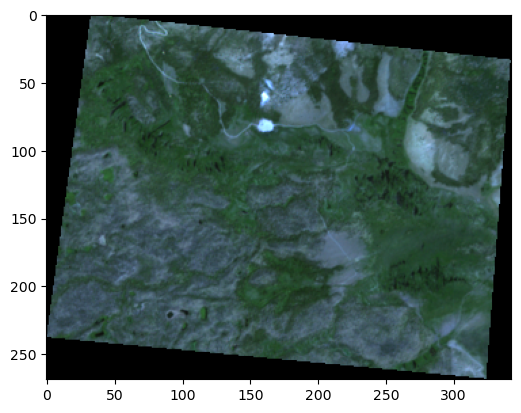

In [45]:
# # -----Load and prepare the satellite image data -----#
# sen2_img, img_info = readTiff(path_in = path_S2_img)
sen2_img, img_info = readTiff(path_in = gee_raster_path) # sen_raster_path  # 
sen2_img = np.float32(np.clip(sen2_img/10000, a_min=0, a_max=1))  ## normalization, had to divided by 100000 cause their values range from 0 to #####
plt.figure(figsize=(6,6))
plt.imshow(sen2_img[:, :, (0,1,2)]*5)

### ---- surface water mapping by using pretrained watnet.
water_map = watnet_infer(rsimg=sen2_img, path_model = watnet_model)
print(water_map)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


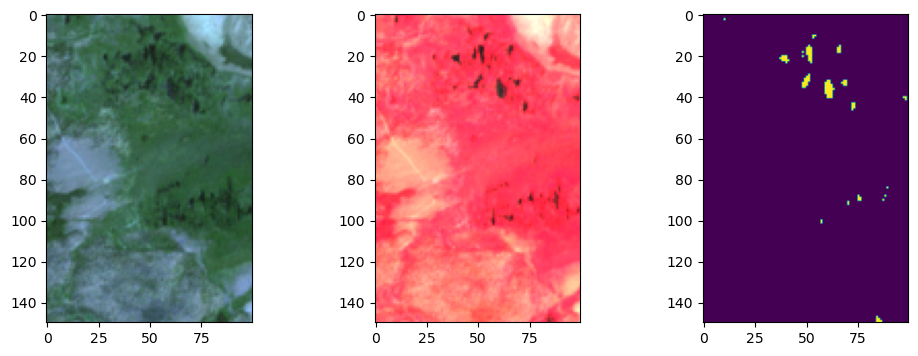

In [46]:
### show the result
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(sen2_img[100:250, 200:300, (0,1,2)]*6.5)
plt.subplot(1,3,2)
plt.imshow(sen2_img[100:250, 200:300, (3,2,1)]*6.5)
plt.subplot(1,3,3)
plt.imshow(water_map[100:250, 200:300, 0])


In [48]:
# ## show the accuracy
# path_sam = 'H:/My Drive/Code/Projects/WatNet/data/test-demo/val_sam.csv'
# df_sam = pd.read_csv(path_sam, header=0)
# acc_oa, acc_prod, acc_user, confus_mat = acc_matrix(water_map, df_sam.to_numpy(), id_label=1)
# print('OA:', acc_oa)
# print('Producer acc:', acc_prod)
# print('user acc:', acc_user)
# print('Confusion matrix:', np.around(confus_mat,4))
# plt.matshow(confus_mat,cmap=plt.cm.Greys, fignum=0)
# plt.colorbar()


### Save the result.

In [49]:
img_info

{'geoextent': (365080.0, 368510.0, 4526440.0, 4529130.0),
 'geotrans': (365080.0, 10.0, 0.0, 4529130.0, 0.0, -10.0),
 'geosrs': '32613',
 'row': 269,
 'col': 343,
 'bands': 6}

In [51]:
# # save the result
writeTiff(im_data = water_map.astype(np.int8), 
          im_geotrans = img_info['geotrans'], 
          im_geosrs = img_info['geosrs'], 
          path_out = path_result_map)
